In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'tahoma'

In [3]:
df = pd.read_excel("./minidata.xlsx")
df

,ID,เพศ,อายุ,Dx,ผ่าตัด,สาเหตุ,ตำแหน่ง,จำนวน,Admit,Duration,ยา,การพยาบาล,ความถี่อุจจาระ
0,ICU1,ชาย,76,OPLL with incomplete cord injury C2-C7,ใช่,Trauma,C,5,29/3/2565,8,Senokot,ไม่ได้ทำ,ทุกวัน
1,ICU2,ชาย,43,C4-C5 subluxation with complete cord injury wi...,ใช่,Trauma,C,4,24/3/2565,13,ไม่ได้ยา,ไม่ได้ทำ,ทุก3 วัน
2,ICU3,ชาย,73,OPLL C2-C5 with fracture C6 with incomplete co...,ใช่,Trauma,C,5,24/2/2565,41,ไม่ได้ยา,Evac,ทุกวัน
3,6,ชาย,48,Cauda equina syndrome,ใช่,Non trauma,L,3,30/3/2565,7,Bisacodyl,"Evac, สอนนวดหน้าท้อง",สวนทุก3 วัน
4,7,ชาย,66,Spinal metastasis C5-C6 c CA lung With DM with...,ใช่,Non trauma,C,2,17/3/2565,20,Bisacodyl,Evac,สวนทุก3 วัน
5,9,ชาย,59,Basilar invagination with cord compression,ไม่ใช่,Non trauma,C,3,2565-02-02 00:00:00,63,Bisacodyl,Evac,สวนทุก3 วัน
6,10,หญิง,68,Spondylodiscitis L1-2 S/P OLIF L2-5,ไม่ใช่,Non trauma,L,5,22/3/2565,15,"Senokot, Bisacodyl",Evac,สวนทุก3 วัน
7,12,หญิง,65,AS c fracture C7 c spinal injury c DM c HT,ใช่,Trauma,C,1,2565-11-03 00:00:00,26,"Senokot, Bisacodyl","Evac, สอนนวดหน้าท้อง",สวนทุก3 วัน
8,13,ชาย,69,Spinal metastasis T3-4 c incomplete cord compr...,ใช่,Non trauma,T,2,2565-06-03 00:00:00,31,"Senokot, Bisacodyl",Evac,สวนทุก3 วัน
9,1204,ชาย,54,Spondylodiscitis L5 c R/O pulmonary TB,ไม่ใช่,Non trauma,L,1,2565-04-04 00:00:00,2,ไม่ได้ยา,ไม่ได้ทำ,NaN


([<matplotlib.patches.Wedge at 0x224bb6f5850>,
 [Text(-0.6465637441936395, -0.8899187180267095, 'ชาย'),
  Text(0.6465637025335375, 0.8899187482945414, 'หญิง')],
 [Text(-0.3526711331965306, -0.48541020983275057, '80.0%'),
  Text(0.3526711104728386, 0.4854102263424771, '20.0%')])

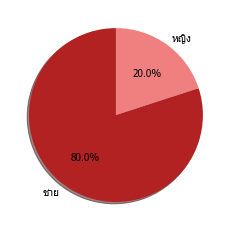

In [4]:
sex=df['เพศ'].value_counts().reset_index()
colormap1=['firebrick','LightCoral','Salmon','DarkSalmon','mistyrose']
plt.pie(sex["เพศ"] ,labels=sex["index"], autopct='%1.1f%%',
        shadow=True, startangle=90,colors=colormap1)

In [5]:
def age_cat(age):
    
    if age >= 0 and age < 10:
        return '0-10'
    if age >= 10 and age < 20:
        return '10-20'
    if age >= 20 and age < 30:
        return '20-30'
    if age >= 30 and age < 40:
        return '30-40'
    if age >= 40 and age < 50:
        return '40-50'
    if age >= 50 and age < 60:
        return '50-60'
    if age >= 60 and age < 70:
        return '60-70'
    if age >= 70 and age < 80:
        return '70-80'
    if age >= 80 and age < 120:
        return '80+'

df['Age_cat']=df["อายุ"].apply(lambda x: age_cat(x))
df

,ID,เพศ,อายุ,Dx,ผ่าตัด,สาเหตุ,ตำแหน่ง,จำนวน,Admit,Duration,ยา,การพยาบาล,ความถี่อุจจาระ,Age_cat
0,ICU1,ชาย,76,OPLL with incomplete cord injury C2-C7,ใช่,Trauma,C,5,29/3/2565,8,Senokot,ไม่ได้ทำ,ทุกวัน,70-80
1,ICU2,ชาย,43,C4-C5 subluxation with complete cord injury wi...,ใช่,Trauma,C,4,24/3/2565,13,ไม่ได้ยา,ไม่ได้ทำ,ทุก3 วัน,40-50
2,ICU3,ชาย,73,OPLL C2-C5 with fracture C6 with incomplete co...,ใช่,Trauma,C,5,24/2/2565,41,ไม่ได้ยา,Evac,ทุกวัน,70-80
3,6,ชาย,48,Cauda equina syndrome,ใช่,Non trauma,L,3,30/3/2565,7,Bisacodyl,"Evac, สอนนวดหน้าท้อง",สวนทุก3 วัน,40-50
4,7,ชาย,66,Spinal metastasis C5-C6 c CA lung With DM with...,ใช่,Non trauma,C,2,17/3/2565,20,Bisacodyl,Evac,สวนทุก3 วัน,60-70
5,9,ชาย,59,Basilar invagination with cord compression,ไม่ใช่,Non trauma,C,3,2565-02-02 00:00:00,63,Bisacodyl,Evac,สวนทุก3 วัน,50-60
6,10,หญิง,68,Spondylodiscitis L1-2 S/P OLIF L2-5,ไม่ใช่,Non trauma,L,5,22/3/2565,15,"Senokot, Bisacodyl",Evac,สวนทุก3 วัน,60-70
7,12,หญิง,65,AS c fracture C7 c spinal injury c DM c HT,ใช่,Trauma,C,1,2565-11-03 00:00:00,26,"Senokot, Bisacodyl","Evac, สอนนวดหน้าท้อง",สวนทุก3 วัน,60-70
8,13,ชาย,69,Spinal metastasis T3-4 c incomplete cord compr...,ใช่,Non trauma,T,2,2565-06-03 00:00:00,31,"Senokot, Bisacodyl",Evac,สวนทุก3 วัน,60-70
9,1204,ชาย,54,Spondylodiscitis L5 c R/O pulmonary TB,ไม่ใช่,Non trauma,L,1,2565-04-04 00:00:00,2,ไม่ได้ยา,ไม่ได้ทำ,NaN,50-60


In [6]:
age_count= df["Age_cat"].sort_values()


In [7]:
age_c =  age_count.value_counts()

<AxesSubplot:xlabel='Age_cat', ylabel='count'>

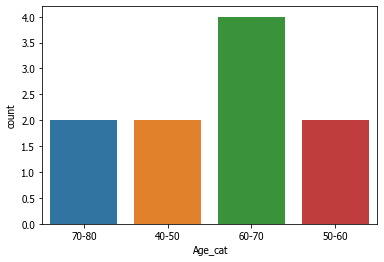

In [8]:
sns.countplot(data=df,x='Age_cat' , alpha=1,zorder=2)

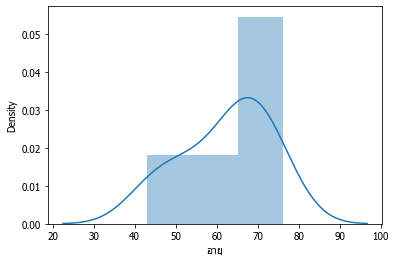

In [9]:
ax = sns.distplot(df.อายุ)